In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore' , message = 'bhag yaha se')

In [27]:
df = pd.read_csv("C:\\Users\\hs081\\Downloads\\Alegerian Fire Dataset Cleaned.csv")

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [29]:
df.drop(['day' , 'month' , 'year'] , axis = 1 , inplace = True)

In [30]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [31]:
df.dtypes

Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [32]:
X = df.drop('FWI' , axis = 1)
y = df['FWI']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.28 , random_state=90)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((174, 11), (69, 11), (174,), (69,))

In [36]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.660912,-0.217770,-0.331452,0.731625,0.472225,0.397543,0.622770,0.455103,0.535912,-0.293164
RH,-0.660912,1.000000,0.259128,0.215167,-0.609127,-0.378371,-0.230736,-0.665592,-0.331370,-0.403089,0.442390
Ws,-0.217770,0.259128,1.000000,0.167612,-0.132132,0.008713,0.065508,0.002739,0.035277,-0.046489,0.239408
Rain,-0.331452,0.215167,0.167612,1.000000,-0.561032,-0.267057,-0.297606,-0.332590,-0.282873,-0.356719,0.036053
FFMC,0.731625,-0.609127,-0.132132,-0.561032,1.000000,0.585077,0.522056,0.727657,0.582048,0.754389,-0.241262
DMC,0.472225,-0.378371,0.008713,-0.267057,0.585077,1.000000,0.894209,0.684649,0.984115,0.567637,-0.223148
DC,0.397543,-0.230736,0.065508,-0.297606,0.522056,0.894209,1.000000,0.540179,0.948496,0.531556,0.039749
ISI,0.622770,-0.665592,0.002739,-0.332590,0.727657,0.684649,0.540179,1.000000,0.655877,0.714958,-0.276312
BUI,0.455103,-0.331370,0.035277,-0.282873,0.582048,0.984115,0.948496,0.655877,1.000000,0.580725,-0.123258
Classes,0.535912,-0.403089,-0.046489,-0.356719,0.754389,0.567637,0.531556,0.714958,0.580725,1.000000,-0.155122


In [37]:
#Feature Selection

<AxesSubplot:>

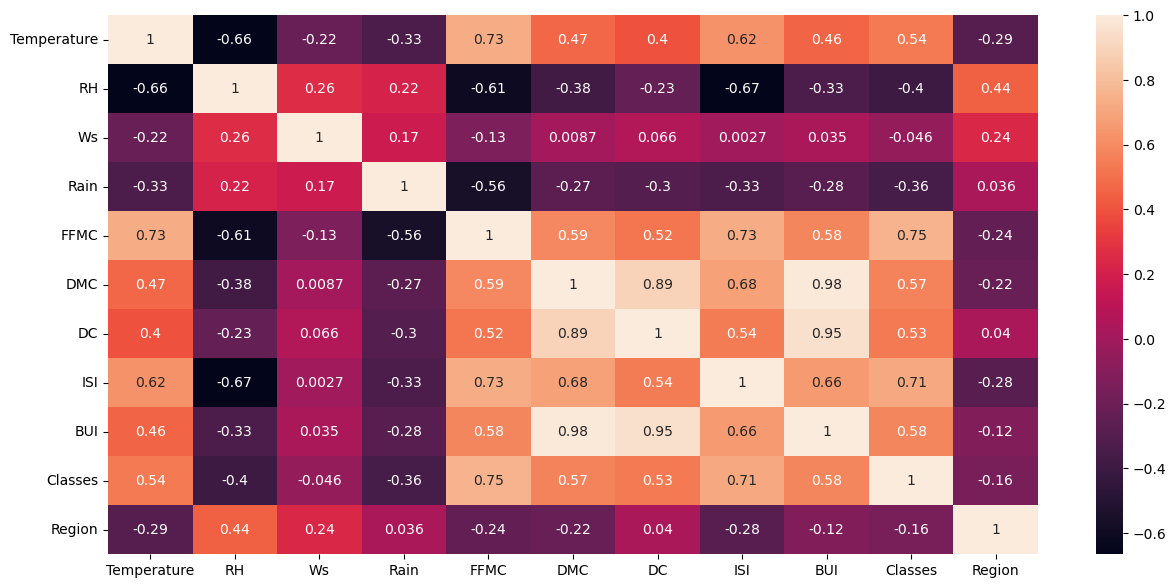

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(X_train.corr() , annot = True)

In [39]:
def correlation(dataset , threshold):
    corr_result = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(i):
            if(corr_matrix.iloc[i ,j] > threshold):
                col_name = corr_matrix.columns[i]
                corr_result.add(col_name)
    return corr_result
        

In [40]:
col_names = correlation(X_train , 0.85)

In [42]:
col_names

{'BUI', 'DC'}

In [43]:
X_train.drop(col_names , axis =1 , inplace = True)

In [44]:
X_test.drop(col_names , axis = 1 , inplace = True )

In [45]:
X_train.shape , X_test.shape

((174, 9), (69, 9))

In [46]:
#Standardization

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
X_test_scaled = scaler.transform(X_test)

In [51]:
#now visualiztion

<AxesSubplot:>

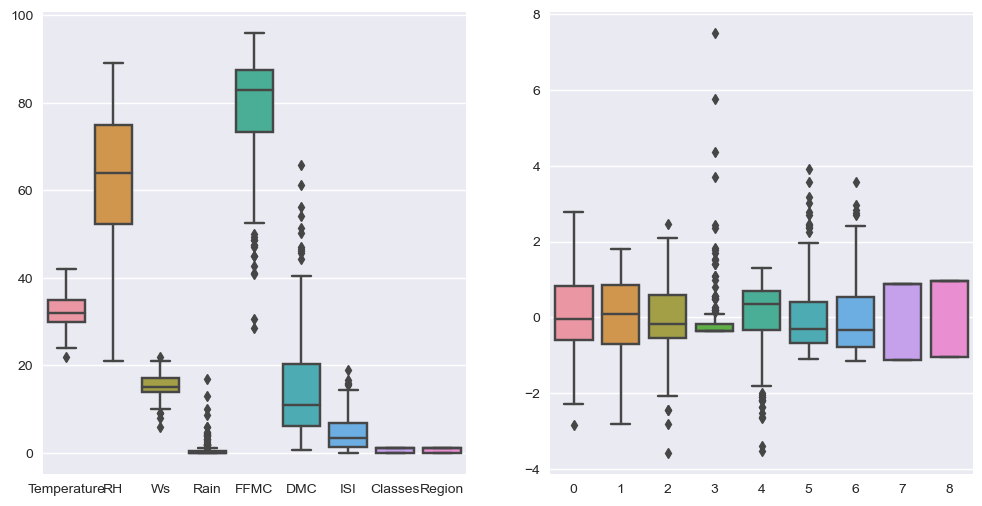

In [52]:
plt.style.use('seaborn')
plt.subplots(1 ,2 , figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)

In [53]:
#Model Traning by Linear Regresssion

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(X_train_scaled , y_train)

LinearRegression()

In [57]:
regressor.intercept_

6.877011494252874

In [58]:
regressor.coef_

array([ 0.06279982, -0.22050725,  0.04879463, -0.06500335, -0.84689513,
        3.78648976,  4.47913534,  0.39713013,  0.44287974])

In [59]:
y_pred = regressor.predict(X_test_scaled)

In [60]:
y_pred

array([ 7.68497351, 15.70655026,  0.40132058, 19.51389995,  9.12496739,
       12.5321368 ,  5.27877766,  0.82334767, 20.99790144, -0.27629999,
        1.30776161,  5.16988469,  9.71239967,  7.79431723, 13.89176454,
       13.08845532,  2.64706572,  0.35976717,  1.42244017, -0.49317814,
       -0.43631081,  5.01691542, 10.11218741, -0.35821449, 14.54954049,
        1.86863578, 17.77643164,  1.91878039,  8.43270467, 11.7529669 ,
       10.80706468, 14.35713134, 10.21600984, 20.22626028, -0.15343711,
        6.90648456, 11.79458915, -1.01584204,  5.89820617,  0.15052049,
       -0.05877835,  7.02716179, 12.30934724,  9.77974112, 21.03609441,
        1.72646791,  3.03590768, -0.40059627, 15.34384285, -0.55436197,
        4.71230972, -0.35437645, 12.40267076, 17.6764879 ,  1.06143689,
       10.30816755,  1.49154076, 17.12551683, -0.32140637,  6.43591828,
       29.03742269, -0.39636965,  6.8817004 , -0.23002611, 15.16912863,
       -1.05447589,  9.83055408, -0.89253318,  0.43370009])

In [61]:
y_test

6       7.2
212    19.4
98      0.6
85     20.3
227     9.8
       ... 
79     17.2
213     0.0
110     9.7
218     0.4
1       0.4
Name: FWI, Length: 69, dtype: float64

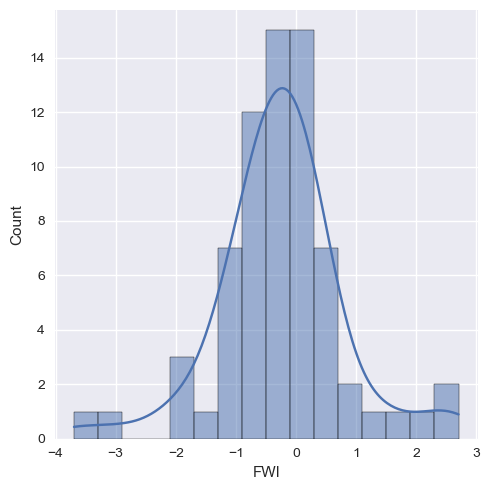

In [62]:
sns.displot(y_pred - y_test , kde = True)

In [63]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [64]:
mse = mean_squared_error(y_test , y_pred)

In [65]:
mae = mean_absolute_error(y_test , y_pred)

In [66]:
rmse = np.sqrt(mse)

In [67]:
mse 

1.1345160443665656

In [68]:
mae

0.7520173004786866

In [69]:
rmse

1.0651366317832496

In [70]:
from sklearn.metrics import r2_score

In [71]:
score = r2_score(y_test , y_pred)

In [72]:
score

0.9787982079056349

In [73]:
score_a = Score_adr = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [74]:
score_a

0.9755640362302233

In [75]:
#Lasso Regression

In [76]:
from sklearn.linear_model import Lasso

In [77]:
lasso = Lasso()

In [78]:
lasso.fit(X_train_scaled, y_train)

Lasso()

In [79]:
y_pred = lasso.predict(X_test_scaled)

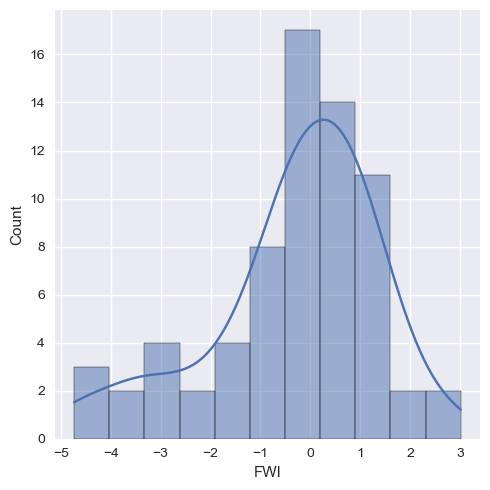

In [80]:
sns.displot(y_pred - y_test , kde = True)

In [81]:
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)

In [82]:
mse

2.8789911269714117

In [83]:
mae

1.2353639768131852

In [84]:
rmse

1.6967590067453338

In [85]:
score = r2_score(y_test , y_pred)
score

0.9461975248224451

In [86]:
score_a = Score_adr = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [87]:
score_a

0.9379903675919706

In [88]:
from sklearn.linear_model import Ridge

In [89]:
ridge = Ridge()

In [90]:
ridge.fit(X_train_scaled , y_train)

Ridge()

In [91]:
y_pred = ridge.predict(X_test_scaled)

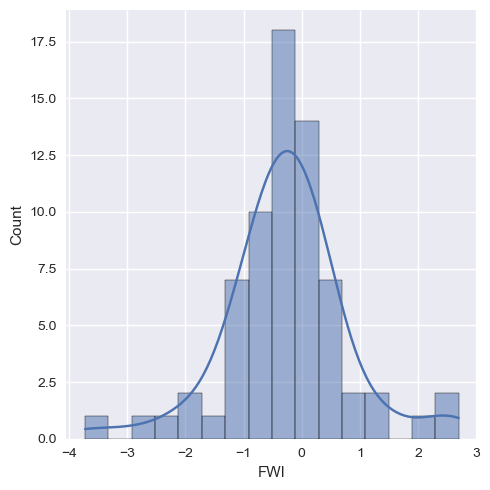

In [92]:
sns.displot(y_pred - y_test , kde = True)

In [93]:
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)

In [94]:
mse

1.158274984291485

In [95]:
mae

0.7652112349889268

In [96]:
rmse

1.0762318450461708

In [97]:
score = r2_score(y_test , y_pred)
score

0.9783542017523751

In [98]:
score_a = Score_adr = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [99]:
score_a

0.9750523003247713

In [100]:
from sklearn.linear_model import ElasticNet

In [101]:
elastic = ElasticNet()

In [102]:
elastic.fit(X_train_scaled, y_train)

ElasticNet()

In [103]:
y_pred = elastic.predict(X_test_scaled)

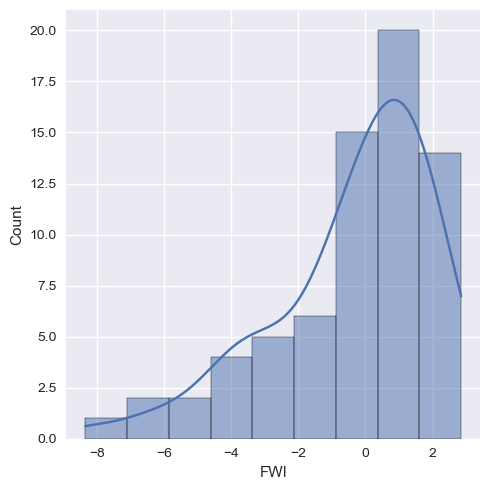

In [104]:
sns.displot(y_pred - y_test , kde = True)

In [105]:
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)

In [106]:
mse

5.82338263020013

In [107]:
mae

1.8151355969252638

In [108]:
rmse

2.4131685871899067

In [109]:
score = r2_score(y_test , y_pred)
score

0.8911728499349912

In [178]:
score_a = Score_adr = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [179]:
score_a

0.8745720982301595

In [182]:
import pickle as p

In [188]:
p.dump(scaler  , open('Scaler.pkl' , 'wb'))
p.dump(ridge , open('Ridge.pkl' , 'wb'))

In [189]:
model_scaler = p.load(open('Scaler.pkl','rb'))

In [197]:
X_test_scaled = model_scaler.fit_transform(X_test)

In [198]:
model_ridge = p.load(open('Ridge.pkl','rb'))

In [199]:
model_ridge

Ridge()

In [201]:
y_pred = model_ridge.predict(X_test_scaled)

In [202]:
y_pred

array([ 7.07508352, 15.96278308, -0.34348317, 20.99339284,  8.89321637,
       12.46987098,  5.58551807,  0.13823301, 20.3626885 , -1.0583269 ,
        0.91229855,  4.87464468,  9.19134787,  7.90129879, 13.39683663,
       13.32673849,  2.53153011, -0.08670093,  0.99128818, -1.15737745,
       -1.0721821 ,  4.76740324,  9.56462609, -1.09420378, 15.35476182,
        1.32416894, 17.83137651,  1.17619895,  8.36759463, 11.85203771,
       10.43637979, 14.08765578, 11.41613412, 21.06454523, -1.00397325,
        7.63356382, 11.77006982, -1.80519159,  5.4977279 , -0.32451626,
       -1.0296084 ,  6.55001274, 11.8493618 ,  9.18661786, 19.84932665,
        1.17721782,  2.75559802, -0.96873725, 15.15611637, -1.51308983,
        5.18429879, -0.99811508, 12.59133219, 19.0112636 ,  0.51871606,
       10.18097877,  0.8287414 , 16.39268487, -1.14344776,  6.41709722,
       29.23617046, -1.37264077,  6.65027437, -1.22964026, 15.10627204,
       -2.05203928,  9.25873375, -1.65252156, -0.23224005])

In [203]:
y_test

6       7.2
212    19.4
98      0.6
85     20.3
227     9.8
       ... 
79     17.2
213     0.0
110     9.7
218     0.4
1       0.4
Name: FWI, Length: 69, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FWI', ylabel='Density'>

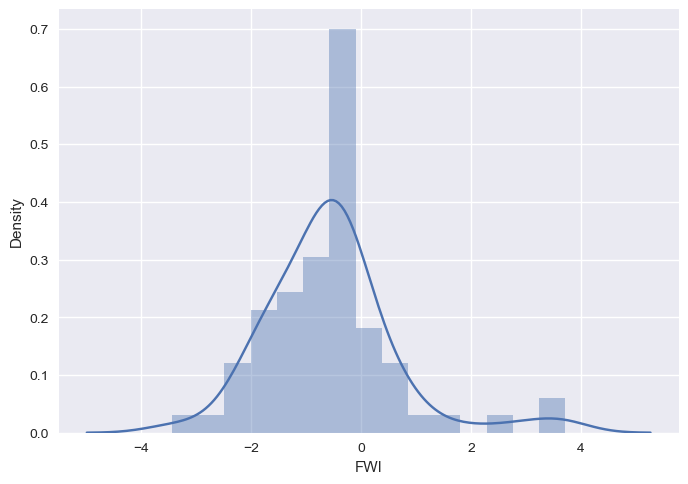

In [204]:
sns.distplot(y_pred - y_test , kde = True)

In [205]:
score = r2_score(y_test , y_pred)
score

0.9674668580035233